# Pandas exploratory analysis

## 1.  Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load_url

In [54]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
html = pd.read_html(url, header =0)
df2019 = html[0]

In [55]:
df2019

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,NaN,0.5,1.0,.500,.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,0.0,NaN,0.5,2.0,.250,.250,0.0,0.0,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,0.0,0.0,NaN,1.9,3.3,.569,.569,0.6,0.9,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


## 3. Cleaning

In [56]:
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,NaN,0.5,1.0,.500,.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,0.0,NaN,0.5,2.0,.250,.250,0.0,0.0,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,0.0,0.0,NaN,1.9,3.3,.569,.569,0.6,0.9,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


### 3.1 Missing values

In [57]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### 3.2 reaplacing missing values with 0

In [58]:
df = raw.fillna(0)

In [59]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [60]:
df = df.drop(['Rk'], axis =1)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,0,0.5,1.0,.500,.500,0.0,0.0,0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [61]:
df.to_csv('nba2019.csv', index = False)

## Exploratory Data Analysis

In [62]:
df = pd.read_csv('nba2019.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [63]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    int64  
 3   Tm      651 non-null    object 
 4   G       651 non-null    int64  
 5   GS      651 non-null    int64  
 6   MP      651 non-null    float64
 7   FG      651 non-null    float64
 8   FGA     651 non-null    float64
 9   FG%     651 non-null    float64
 10  3P      651 non-null    float64
 11  3PA     651 non-null    float64
 12  3P%     651 non-null    float64
 13  2P      651 non-null    float64
 14  2PA     651 non-null    float64
 15  2P%     651 non-null    float64
 16  eFG%    651 non-null    float64
 17  FT      651 non-null    float64
 18  FTA     651 non-null    float64
 19  FT%     651 non-null    float64
 20  ORB     651 non-null    float64
 21  DRB     651 non-null    float64
 22  TR

### Show specific data type

In [65]:
df.select_dtypes(include = ['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,26,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,22,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,34,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,23,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,21,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,27,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,30,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,0.5,2.0,0.250,0.250,0.0,0.0,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,23,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,1.9,3.3,0.569,0.569,0.6,0.9,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [66]:
df.select_dtypes(include = ['object'])

,Player,Pos,Tm
0,Steven Adams,C,OKC
1,Bam Adebayo,PF,MIA
2,LaMarcus Aldridge,C,SAS
3,Kyle Alexander,PF,MIA
4,Nickeil Alexander-Walker,SG,NOP
...,...,...,...
646,Trae Young,PG,ATL
647,Cody Zeller,C,CHO
648,Tyler Zeller,C,SAS
649,Ante Žižić,C,CLE


### Question

#### Conditional Selection  
In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

**Which player scored the most Points (PTS) Per Game?** Here, we will return the entire row.

In [67]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


In [68]:
#Other form
df.nlargest(1, 'PTS')

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


Specific columns

In [69]:
playersmostpoints = df[df.PTS==df.PTS.max()]

Further question, what team is the player from?

In [70]:
#players Team
playersmostpoints.Tm

257    HOU
Name: Tm, dtype: object

Which position is the player playing as?

In [71]:
playersmostpoints.Pos

257    SG
Name: Pos, dtype: object

How many games did the player played in the season?

In [72]:
playersmostpoints.G

257    68
Name: G, dtype: int64

**Which player scored more than 20 Points (PTS) Per Game?**

In [73]:
df[df.PTS>20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,0.589,6.3,10.0,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
40,Bradley Beal,SG,26,WAS,57,57,36.0,10.4,22.9,0.455,3.0,8.4,0.353,7.4,14.4,0.515,0.520,6.8,8.0,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
43,Malik Beasley,SG,23,MIN,14,14,33.1,7.9,16.6,0.472,3.5,8.2,0.426,4.4,8.4,0.517,0.577,1.5,2.0,0.750,0.6,4.4,5.1,1.9,0.6,0.1,1.5,1.9,20.7
60,Bojan Bogdanović,SF,30,UTA,63,63,33.1,6.6,14.8,0.447,3.0,7.3,0.414,3.6,7.6,0.479,0.548,4.0,4.4,0.903,0.6,3.5,4.1,2.1,0.5,0.1,2.5,1.7,20.2
68,Devin Booker,SG,23,PHO,70,70,35.9,9.0,18.3,0.489,2.0,5.7,0.354,6.9,12.6,0.549,0.544,6.7,7.3,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
85,Jaylen Brown,SF,23,BOS,57,57,33.9,7.5,15.6,0.481,2.3,5.9,0.382,5.2,9.6,0.543,0.554,3.1,4.3,0.724,1.1,5.3,6.4,2.1,1.1,0.4,2.2,2.9,20.3
137,John Collins,PF,22,ATL,41,41,33.2,8.6,14.8,0.583,1.4,3.6,0.401,7.2,11.2,0.642,0.632,2.9,3.7,0.800,2.8,7.3,10.1,1.5,0.8,1.6,1.8,3.4,21.6
158,Stephen Curry,PG,31,GSW,5,5,27.8,6.6,16.4,0.402,2.4,9.8,0.245,4.2,6.6,0.636,0.476,5.2,5.2,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,1.2,3.5,0.330,7.7,14.2,0.546,0.536,7.2,8.5,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1
169,DeMar DeRozan,SF,30,SAS,68,68,34.1,8.2,15.4,0.531,0.1,0.5,0.257,8.1,14.9,0.540,0.535,5.6,6.6,0.845,0.6,4.9,5.5,5.6,1.0,0.3,2.4,2.6,22.1


**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [74]:
df[df['3P']==df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
257,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3


**Which player had the highest Assists Per Game (AST) ?**

In [75]:
df[df['AST']==df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
319,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,2.2,6.3,0.348,7.4,13.1,0.564,0.55,3.9,5.7,0.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


In [105]:
# The five players with highest assist per game?
df.nlargest(5, 'AST')[['Player', 'Tm', 'Pos', 'AST']].reset_index(drop = True)

,Player,Tm,Pos,AST
0,LeBron James,LAL,PG,10.2
1,Trae Young,ATL,PG,9.3
2,Luka Dončić,DAL,PG,8.8
3,Ricky Rubio,PHO,PG,8.8
4,Damian Lillard,POR,PG,8.0


#### Groupby funtion()

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [76]:
LAL = df.groupby('Tm').get_group('LAL')

In [77]:
LAL[LAL['PTS']==LAL['PTS'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
162,Anthony Davis,PF,26,LAL,62,62,34.4,8.9,17.7,0.503,1.2,3.5,0.33,7.7,14.2,0.546,0.536,7.2,8.5,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1


**Of the 5 positions, which position scores the most points?**  
We first group players by their positions.

In [78]:
df.groupby('Pos').describe()

Age                             ...     PTS                     
       count       mean       std   min  ...     25%    50%     75%   max
Pos                                      ...                             
C      111.0  26.180180  3.977661  19.0  ...   4.750   7.40  11.200  26.5
C-PF     2.0  24.500000  0.707107  24.0  ...   3.325   3.45   3.575   3.7
PF     135.0  25.688889  4.392101  19.0  ...   3.150   5.90  11.250  29.5
PF-C     2.0  31.000000  2.828427  29.0  ...  10.150  10.90  11.650  12.4
PG     111.0  26.099099  3.868180  19.0  ...   4.900   7.70  13.100  30.0
SF     114.0  25.780702  4.191772  19.0  ...   4.050   6.40  10.575  27.1
SF-PF    4.0  27.250000  5.619905  20.0  ...   2.075   3.00   6.875  16.7
SF-SG    3.0  26.333333  3.214550  24.0  ...   5.950   8.80  15.300  21.8
SG     169.0  25.224852  3.699626  19.0  ...   3.300   7.00  11.900  34.3

[9 rows x 208 columns]

In [79]:
df['Pos'].unique()

array(['C', 'PF', 'SG', 'SF', 'PG', 'SF-SG', 'C-PF', 'SF-PF', 'PF-C'],
      dtype=object)

In [80]:
position = ['SG', 'PF', 'PG', 'C', 'SF']
POS = df[df['Pos'].isin(position)]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,0.5,2.0,0.250,0.250,0.0,0.0,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,1.9,3.3,0.569,0.569,0.6,0.9,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [81]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,111.0,8.434234,5.279988,0.0,4.75,7.4,11.200,26.5
PF,135.0,7.714074,6.173416,0.0,3.15,5.9,11.250,29.5
PG,111.0,10.020721,7.119999,0.5,4.90,7.7,13.100,30.0
SF,114.0,7.962281,5.674448,0.0,4.05,6.4,10.575,27.1
SG,169.0,8.428994,6.336660,0.0,3.30,7.0,11.900,34.3


#### Histogram

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [82]:
PTS = df[['PTS', 'Pos']]
PTS = PTS[ PTS['Pos'].isin(position)  ]
PTS

,PTS,Pos
0,10.9,C
1,15.9,PF
2,18.9,C
3,1.0,PF
4,5.7,SG
...,...,...
646,29.6,PG
647,11.1,C
648,1.0,C
649,4.4,C


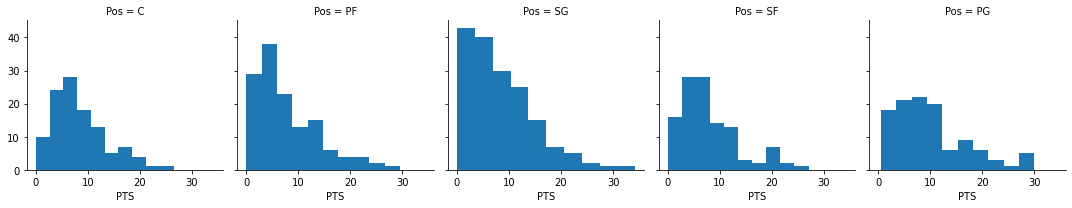

In [83]:
g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS")

**Box plot**

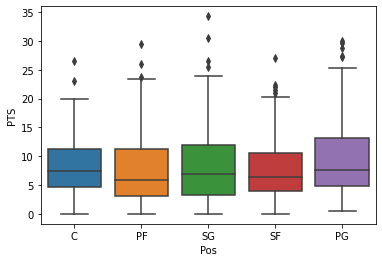

In [84]:
sns.boxplot(x= 'Pos', y = 'PTS', data = PTS)

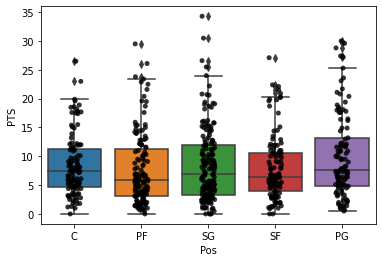

In [85]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### More question

**The five players with mos Rebounds?**

In [108]:
df.nlargest(5, 'TRB')[['Player', 'Tm', 'Pos', 'TRB']].reset_index(drop= True)

,Player,Tm,Pos,TRB
0,Andre Drummond,DET,C,15.8
1,Andre Drummond,TOT,C,15.2
2,Clint Capela,HOU,C,13.8
3,Giannis Antetokounmpo,MIL,PF,13.6
4,Rudy Gobert,UTA,C,13.5


**Hows the 5 players with most block?**

In [109]:
df.nlargest(5, 'BLK')[['Player', 'Tm', 'Pos', 'BLK']].reset_index(drop= True)

,Player,Tm,Pos,BLK
0,Hassan Whiteside,POR,C,2.9
1,Brook Lopez,MIL,C,2.4
2,Anthony Davis,LAL,PF,2.3
3,Jonathan Isaac,ORL,SF,2.3
4,Robert Covington,HOU,C,2.2


**wich Players with most stl?**

In [110]:
df.nlargest(5, 'STL')[['Player', 'Tm', 'Pos', 'STL']].reset_index(drop=True)

,Player,Tm,Pos,STL
0,Ben Simmons,PHI,PG,2.1
1,Andre Drummond,DET,C,2.0
2,Kris Dunn,CHI,PG,2.0
3,Andre Drummond,TOT,C,1.9
4,Fred VanVleet,TOR,PG,1.9


**% of free trhows**

In [111]:
df.nlargest(5, 'FT%')[['Player', 'Tm', 'FT%']].reset_index(drop= True)

,Player,Tm,FT%
0,Jordan Bell,MEM,1.0
1,Jonah Bolden,PHO,1.0
2,Charlie Brown,ATL,1.0
3,Bruno Caboclo,HOU,1.0
4,Vlatko Čančar,DEN,1.0


**Tree point per game**

In [112]:
df.nlargest(5, '3PA')[['Player', 'Tm', '3PA']].reset_index(drop= True)

,Player,Tm,3PA
0,James Harden,HOU,12.4
1,Damian Lillard,POR,10.2
2,Stephen Curry,GSW,9.8
3,D'Angelo Russell,GSW,9.7
4,Buddy Hield,SAC,9.6
